In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unittest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# <b>Concrete compressive strength prediction
by Krasimir Chernev / August 2022

## Abstract

### What is concrete and why it is so important?

Concrete is a composite material composed of fine and coarse aggregate bonded together with a fluid cement (cement paste) that hardens (cures) over time.  Concrete is the second-most-used substance in the world after water and is the most widely used building material. Its usage worldwide, ton for ton, is twice that of steel, wood, plastics, and aluminum combined. 
When aggregate is mixed with dry Portland cement and water, the mixture forms a fluid slurry that is easily poured and molded into shape (formwork). The cement reacts with the water through a process called concrete hydration that hardens over several hours to form a hard matrix that binds the materials together into a durable stone-like material that has many uses.
Concrete is one of the most durable building materials. It provides superior fire resistance compared with wooden construction and gains strength over time. Structures made of concrete can have a long service life. Concrete is used more than any other artificial material in the world.
Hardened concrete is very good at handling compressive loads. This is its main property.

<center><img src = "images/Compressive-Strength-Of_Concrete-Kobe.jpg", style = "width: 500px; height: 200px">

There are several ways to determine concrete compressive strength - destructive or non-destructive, in-situ or laboratory. Most common way is by taking samples (cylinder or cubic shaped) at the moment of pouring and after curing -  crushing them in a hydraulic press and measuring the compression with a pressure gauge. The recommended wait time for testing the cylinder is 28 days to ensure correct results. If we add the variaty of combination of mixtures it can take too long to determine the right one we need. Also, this method is prone to human error and one small mistake can cause the wait time to drastically increase.

<table><tr>
<td><img src = "images\Compression-Testing-Machine-and-Concrete-Cube-Specimen-at-the-Moment-of-Failure-Figure-5.png" style = "width: 400px; height: 200px"><img src = "images\download.jfif" style = "width: 195px; height: 200px"></td>
</tr></table>

These tests have been performed for many numbers of times now and we have enough real-world data. This is the way used for acquiring the information in datasets we will use further. But it only allows us to state the compressive strength. When it comes to modeling different structural properties, such as tensile strength, and to predict the flexural and shear capacity of the elements we need to know this most important parameter in advance.

## Introduction

One way to reduce the wait time and the number of combinations to try is to make a computer  simulations, where we can provide information to the model about what we already know and it tries different combinations to predict the compressive strength. This is the main purpose of this article - Predicting Compressive Strength of Concrete by given its age and quantitative measurements of ingredients.

So to do that first we have to know what information we have and what are the dependencies between all the raw materials and how affects to concrete strength.

### Dataset description

I will use combination of two dataset from different sources for better modelling.
Datasets can be found in:
1. [UCI - ML Repository - Concrete Compressive Strength Data Set](http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)
2. [The University of Melbourne - Compressive strength dataset of normal concrete](https://melbourne.figshare.com/articles/dataset/Compressive_strength_dataset_of_foamed_normal_concrete_for_prediction_model/7028369)

Number of instances (observations) - 1030 + 1133

Number of attributes (features) - 9

There are 8 input variables and 1 output variable.

**Inputs**
- Cement
- Blast Furnace Slag
- Fly Ash
- Water
- Superplasticizer
- Coarse Aggregate
- Fine Aggregate

All of the above represent the amount of raw materials measured in $kg/m^3$

- Age

This one represent the maturity of the concrete measured in days.

**Outputs**

- Concrete Compressive Strength

This is our target variable and is measured in $MPa$

## Exploratory Data Analysis (EDA)

First we have to load and read the information from the datasets. Then will concatenate the two sets in one and rename the features with shorter names for easier work further. After that lets look inside the information and check the types of the features, check for missing values, plot the features in respect to the target variable, observing the distributions of all the features and so on.

### Reading the data

In [3]:
dataset_1 = pd.read_excel("data\Concrete_Data.xls")

In [4]:
dataset_1.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


In [5]:
dataset_1.rename(columns = {
    "Cement (component 1)(kg in a m^3 mixture)": "cement",
    "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": "slag",
    "Fly Ash (component 3)(kg in a m^3 mixture)": "ash",
    "Water  (component 4)(kg in a m^3 mixture)": "water",
    "Superplasticizer (component 5)(kg in a m^3 mixture)": "superplasticizer",
    "Coarse Aggregate  (component 6)(kg in a m^3 mixture)": "coarse_aggregate",
    "Fine Aggregate (component 7)(kg in a m^3 mixture)": "fine_aggregate",
    "Age (day)": "age",
    "Concrete compressive strength(MPa, megapascals) ": "concr_compr_str"
}, inplace = True)

In [6]:
dataset_1.head(3)

,cement,slag,ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concr_compr_str
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


In [7]:
dataset_2 = pd.read_excel("data\Dataset2.xlsx")

In [8]:
dataset_2.head(3)

,Cement\n(kg/m3),Blast-furnace Slag\n(kg/m3),Fly Ash\n(kg/m3),Water\n(kg/m3),Super-plasticizer\n(kg/m3),Coarse Aggregate \n(kg/m3),Fine Aggregate\n(kg/m3),Age of testing\n(day),Concrete compressive strength\n(MPa)
0,336.0,0.0,0.0,182.0,3.0,986.0,817.0,28,44.864203
1,140.1,4.2,215.9,193.9,4.7,1049.5,710.1,28,26.420000
2,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14,22.532076


In [9]:
dataset_2.rename(columns = {
    "Cement\n(kg/m3)": "cement",
    "Blast-furnace Slag\n(kg/m3)": "slag",
    "Fly Ash\n(kg/m3)": "ash",
    "Water\n(kg/m3)": "water",
    "Super-plasticizer\n(kg/m3)": "superplasticizer",
    "Coarse Aggregate \n(kg/m3)": "coarse_aggregate",
    "Fine Aggregate\n(kg/m3)": "fine_aggregate",
    "Age of testing\n(day)": "age",
    "Concrete compressive strength\n(MPa) ": "concr_compr_str"
}, inplace = True)

In [10]:
dataset_2.head(3)

,cement,slag,ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concr_compr_str
0,336.0,0.0,0.0,182.0,3.0,986.0,817.0,28,44.864203
1,140.1,4.2,215.9,193.9,4.7,1049.5,710.1,28,26.420000
2,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14,22.532076


### Modifying the data

In [11]:
concrete_data = pd.concat([dataset_1, dataset_2], ignore_index = True)

In [12]:
concrete_data

,cement,slag,ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concr_compr_str
0,540.00,0.00,0.00,162.00,2.50,1040.0,676.00,28,79.986111
1,540.00,0.00,0.00,162.00,2.50,1055.0,676.00,28,61.887366
2,332.50,142.50,0.00,228.00,0.00,932.0,594.00,270,40.269535
3,332.50,142.50,0.00,228.00,0.00,932.0,594.00,365,41.052780
4,198.60,132.40,0.00,192.00,0.00,978.4,825.50,360,44.296075
...,...,...,...,...,...,...,...,...,...
2158,500.00,0.00,0.00,140.00,4.00,966.0,853.00,28,67.568648
2159,182.04,45.21,121.97,170.21,8.19,1059.4,780.65,56,43.499041
2160,236.00,0.00,0.00,194.00,0.00,968.0,885.00,28,18.415904
2161,252.00,0.00,0.00,185.00,0.00,1111.0,784.00,28,19.691435


In [13]:
concrete_data.shape

(2163, 9)

In [14]:
concrete_data.dtypes

cement              float64
slag                float64
ash                 float64
water               float64
superplasticizer    float64
coarse_aggregate    float64
fine_aggregate      float64
age                   int64
concr_compr_str     float64
dtype: object

In [15]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            2163 non-null   float64
 1   slag              2163 non-null   float64
 2   ash               2163 non-null   float64
 3   water             2163 non-null   float64
 4   superplasticizer  2163 non-null   float64
 5   coarse_aggregate  2163 non-null   float64
 6   fine_aggregate    2163 non-null   float64
 7   age               2163 non-null   int64  
 8   concr_compr_str   2163 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 152.2 KB


From all of the above results we can see that the two datasets are concatenated corectly as one, the new dataset has 1030 + 1133 = 2163 instances and kepts the 9 features. The variable types are as expected and there are no null values in it.

How we measure these differences - with tests. Lets look at the "age" feature - it shows the day, after pouring the concrete, when the test was made.  

In [16]:
def prepare_data_to_plot(df):
    important_days = sorted(df["age"].unique())
    tests_by_days = df.groupby("age")["concr_compr_str"].count()
    tests_by_days = tests_by_days.to_list()
    return important_days, tests_by_days

In [17]:
def plot_bar_of_tests(df):
    important_days, tests_by_days = prepare_data_to_plot(df)
    plt.figure(figsize = (15,5))
    plt.bar(important_days, tests_by_days, width = 3)
    plt.xticks(important_days, rotation = 45)
    plt.xlabel("Age [days]")
    plt.ylabel("Number of tests")
    plt.title("Number of tests done in a specific period of time")
    plt.tight_layout()
    plt.show()

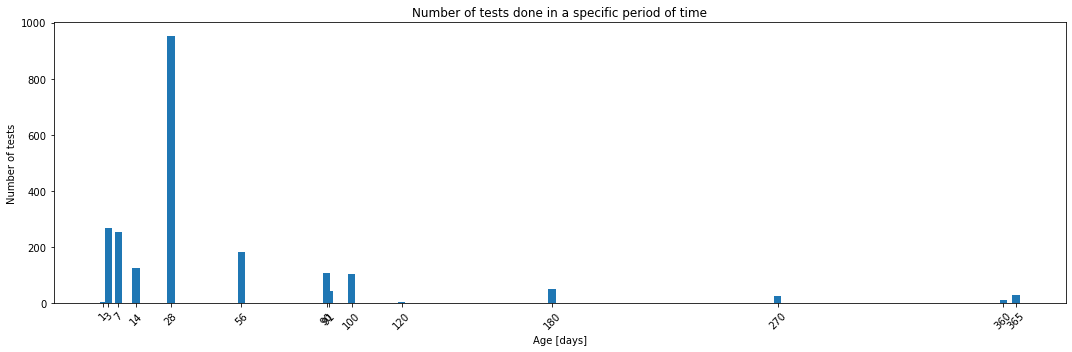

In [18]:
plot_bar_of_tests(concrete_data)

Interesting here is that we have a division to 90 and 91 days. The information about these should refer to 13th week of curing age. It is a matter of interpretation. So we can combine the information in these two rows.

In [19]:
concrete_data[concrete_data["age"] == 90]

,cement,slag,ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concr_compr_str
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.074244
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.326932
15,380.0,0.0,0.0,228.0,0.0,932.0,670.0,90,52.908320
16,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,90,39.358048
...,...,...,...,...,...,...,...,...,...
2116,339.0,0.0,0.0,197.0,0.0,968.0,781.0,90,35.170171
2117,350.0,0.0,0.0,203.0,0.0,974.0,775.0,90,31.350474
2139,254.0,0.0,0.0,198.0,0.0,968.0,863.0,90,26.944722
2150,212.0,141.3,0.0,203.5,0.0,973.4,750.0,90,39.700028


In [20]:
concrete_data["age"].replace({90: 91}, inplace = True)

In [21]:
concrete_data[concrete_data["age"] == 90]

,cement,slag,ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concr_compr_str


In [22]:
len(concrete_data[concrete_data["age"] == 90])

0

We transfer the information for 90th day to 91st day.

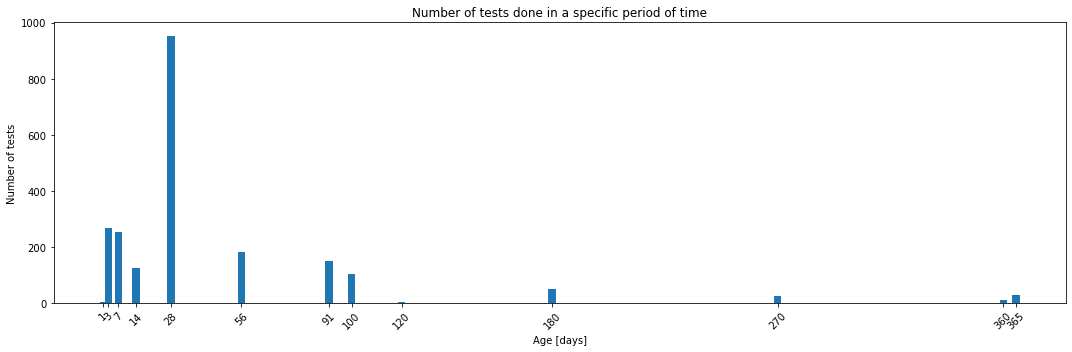

In [23]:
plot_bar_of_tests(concrete_data)

As we can see from the diagram above most of the test were done on the 28th day (4 weeks) of concrete curing. It is proven that at 28th day concrete reaches 99% of its compressive strength. 

The other interesting periods of observation are the 3rd and 7th day (a week). It is proven that the strength of the concrete in these days (about 65% to 80%) is enough for early removing some parts of the formwork. This is very important for managing the formwork set.

### Exploring the data

Concrete have four main ingredients - cement, water, fine aggregate and coarse agregate, others are additives and may or may not be part of the mix. Lets take the information only for the mixtures that include these 4 main feature and do some plots.

In [24]:
base_concrete = concrete_data.loc[
    (concrete_data["slag"] == 0) & 
    (concrete_data["ash"] == 0) & 
    (concrete_data["superplasticizer"] == 0)
]
base_concrete

,cement,slag,ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concr_compr_str
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790
15,380.0,0.0,0.0,228.0,0.0,932.0,670.0,91,52.908320
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.620648
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.516697
25,380.0,0.0,0.0,228.0,0.0,932.0,670.0,270,53.300632
...,...,...,...,...,...,...,...,...,...
2152,382.0,0.0,0.0,185.0,0.0,1047.0,739.0,7,24.000660
2155,296.0,0.0,0.0,186.0,0.0,1090.0,769.0,7,18.912327
2156,393.0,0.0,0.0,192.0,0.0,940.0,758.0,91,48.794217
2160,236.0,0.0,0.0,194.0,0.0,968.0,885.0,28,18.415904


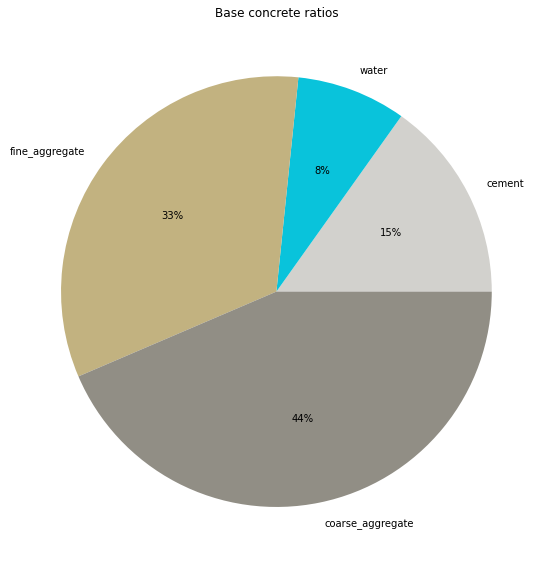

In [25]:
ingredients = [base_concrete.cement.mean(), base_concrete.water.mean(), base_concrete.fine_aggregate.mean(), base_concrete.coarse_aggregate.mean()]
names = [base_concrete.cement.name, base_concrete.water.name, base_concrete.fine_aggregate.name, base_concrete.coarse_aggregate.name]

plt.rcParams["figure.figsize"] = (8, 8)
plt.pie(ingredients, labels = names, colors = ["#D2D1CD", "#09C3DB", "#C2B280", "#918E85"], autopct = "%1.f%%")
plt.title("Base concrete ratios")
plt.tight_layout()
plt.show()

This piechart represents the base formula to mix a concrete - 1 part of cement : 2 parts of fine aggregate (sand) : 3 parts of coarse aggregate, and the water in liters is 55% of cement weight. Of course we can vary this ratios (and with different additives) to produce concrete with different properties.

Now lets look at the correlations between the input features. We can plot a correlation matrix of the featurures to se how each variable is affecting the others. This represents Pearson correlations between the features.

#### Correlations

In [26]:
correlations = concrete_data.corr()

In [27]:
correlations

,cement,slag,ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concr_compr_str
cement,1.000000,-0.273905,-0.409823,-0.086096,0.079456,-0.088509,-0.203085,0.086609,0.492918
slag,-0.273905,1.000000,-0.303201,0.103213,0.048231,-0.275000,-0.278682,-0.044091,0.127204
ash,-0.409823,-0.303201,1.000000,-0.195229,0.363389,-0.067102,0.030860,-0.159721,-0.082886
water,-0.086096,0.103213,-0.195229,1.000000,-0.620161,-0.231610,-0.437292,0.259037,-0.283423
superplasticizer,0.079456,0.048231,0.363389,-0.620161,1.000000,-0.271147,0.209633,-0.196535,0.360679
coarse_aggregate,-0.088509,-0.275000,-0.067102,-0.231610,-0.271147,1.000000,-0.163711,0.011468,-0.159214
fine_aggregate,-0.203085,-0.278682,0.030860,-0.437292,0.209633,-0.163711,1.000000,-0.147334,-0.166183
age,0.086609,-0.044091,-0.159721,0.259037,-0.196535,0.011468,-0.147334,1.000000,0.326347
concr_compr_str,0.492918,0.127204,-0.082886,-0.283423,0.360679,-0.159214,-0.166183,0.326347,1.000000


For better visualization we can plot the correlation matrix as a heatmap.

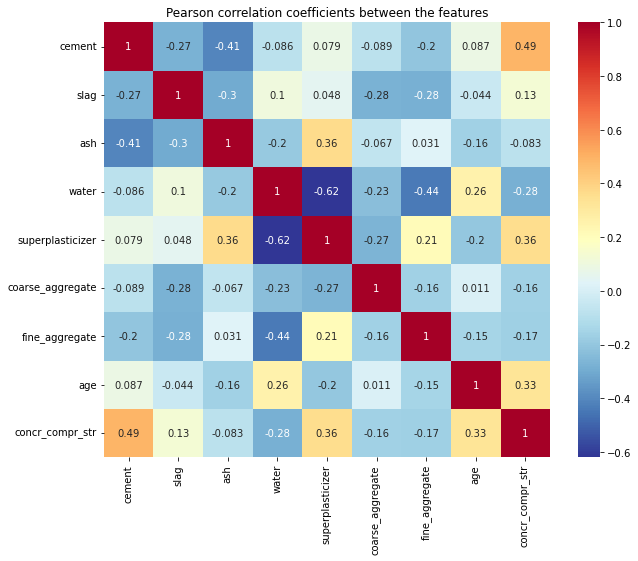

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(correlations, annot = True, cmap = "RdYlBu_r")
plt.title("Pearson correlation coefficients between the features")
plt.show()

What we can see in this heatmap is that there is a strong possitive correlation between the concrete strength and the cement. As a main "glue" material with the increasing of the cement the concrete strength increases too.

Also we can see that superplasticizers and the age (maturity of the mixture) have possitive influence on the strength.

- Mentioning superplasticizers we can see that there is a very strong negative correlation between them and the water. This is true, because their main purpose is to reduce the amonth of water in the mixture without compromising its ductility and workability. These chemical suppliments are used mainly in cold weather when there is chance, despite curing of the concrete is exothermal process, the water in the mixture to freeze or when we have very specific elements, like sloping roof slabs or inclined columns for example.

    Also we can see that ash and fine aggregate (small partical substances) assist the superplasticizers in their function, thats way they have high correlation between them.
- As far as the age - concrete continue gaining strength almost during its whole lifecycle, so ageing increases the strength.

To see even more detailed information about these correlations we ca plot pairwise relations of the features:

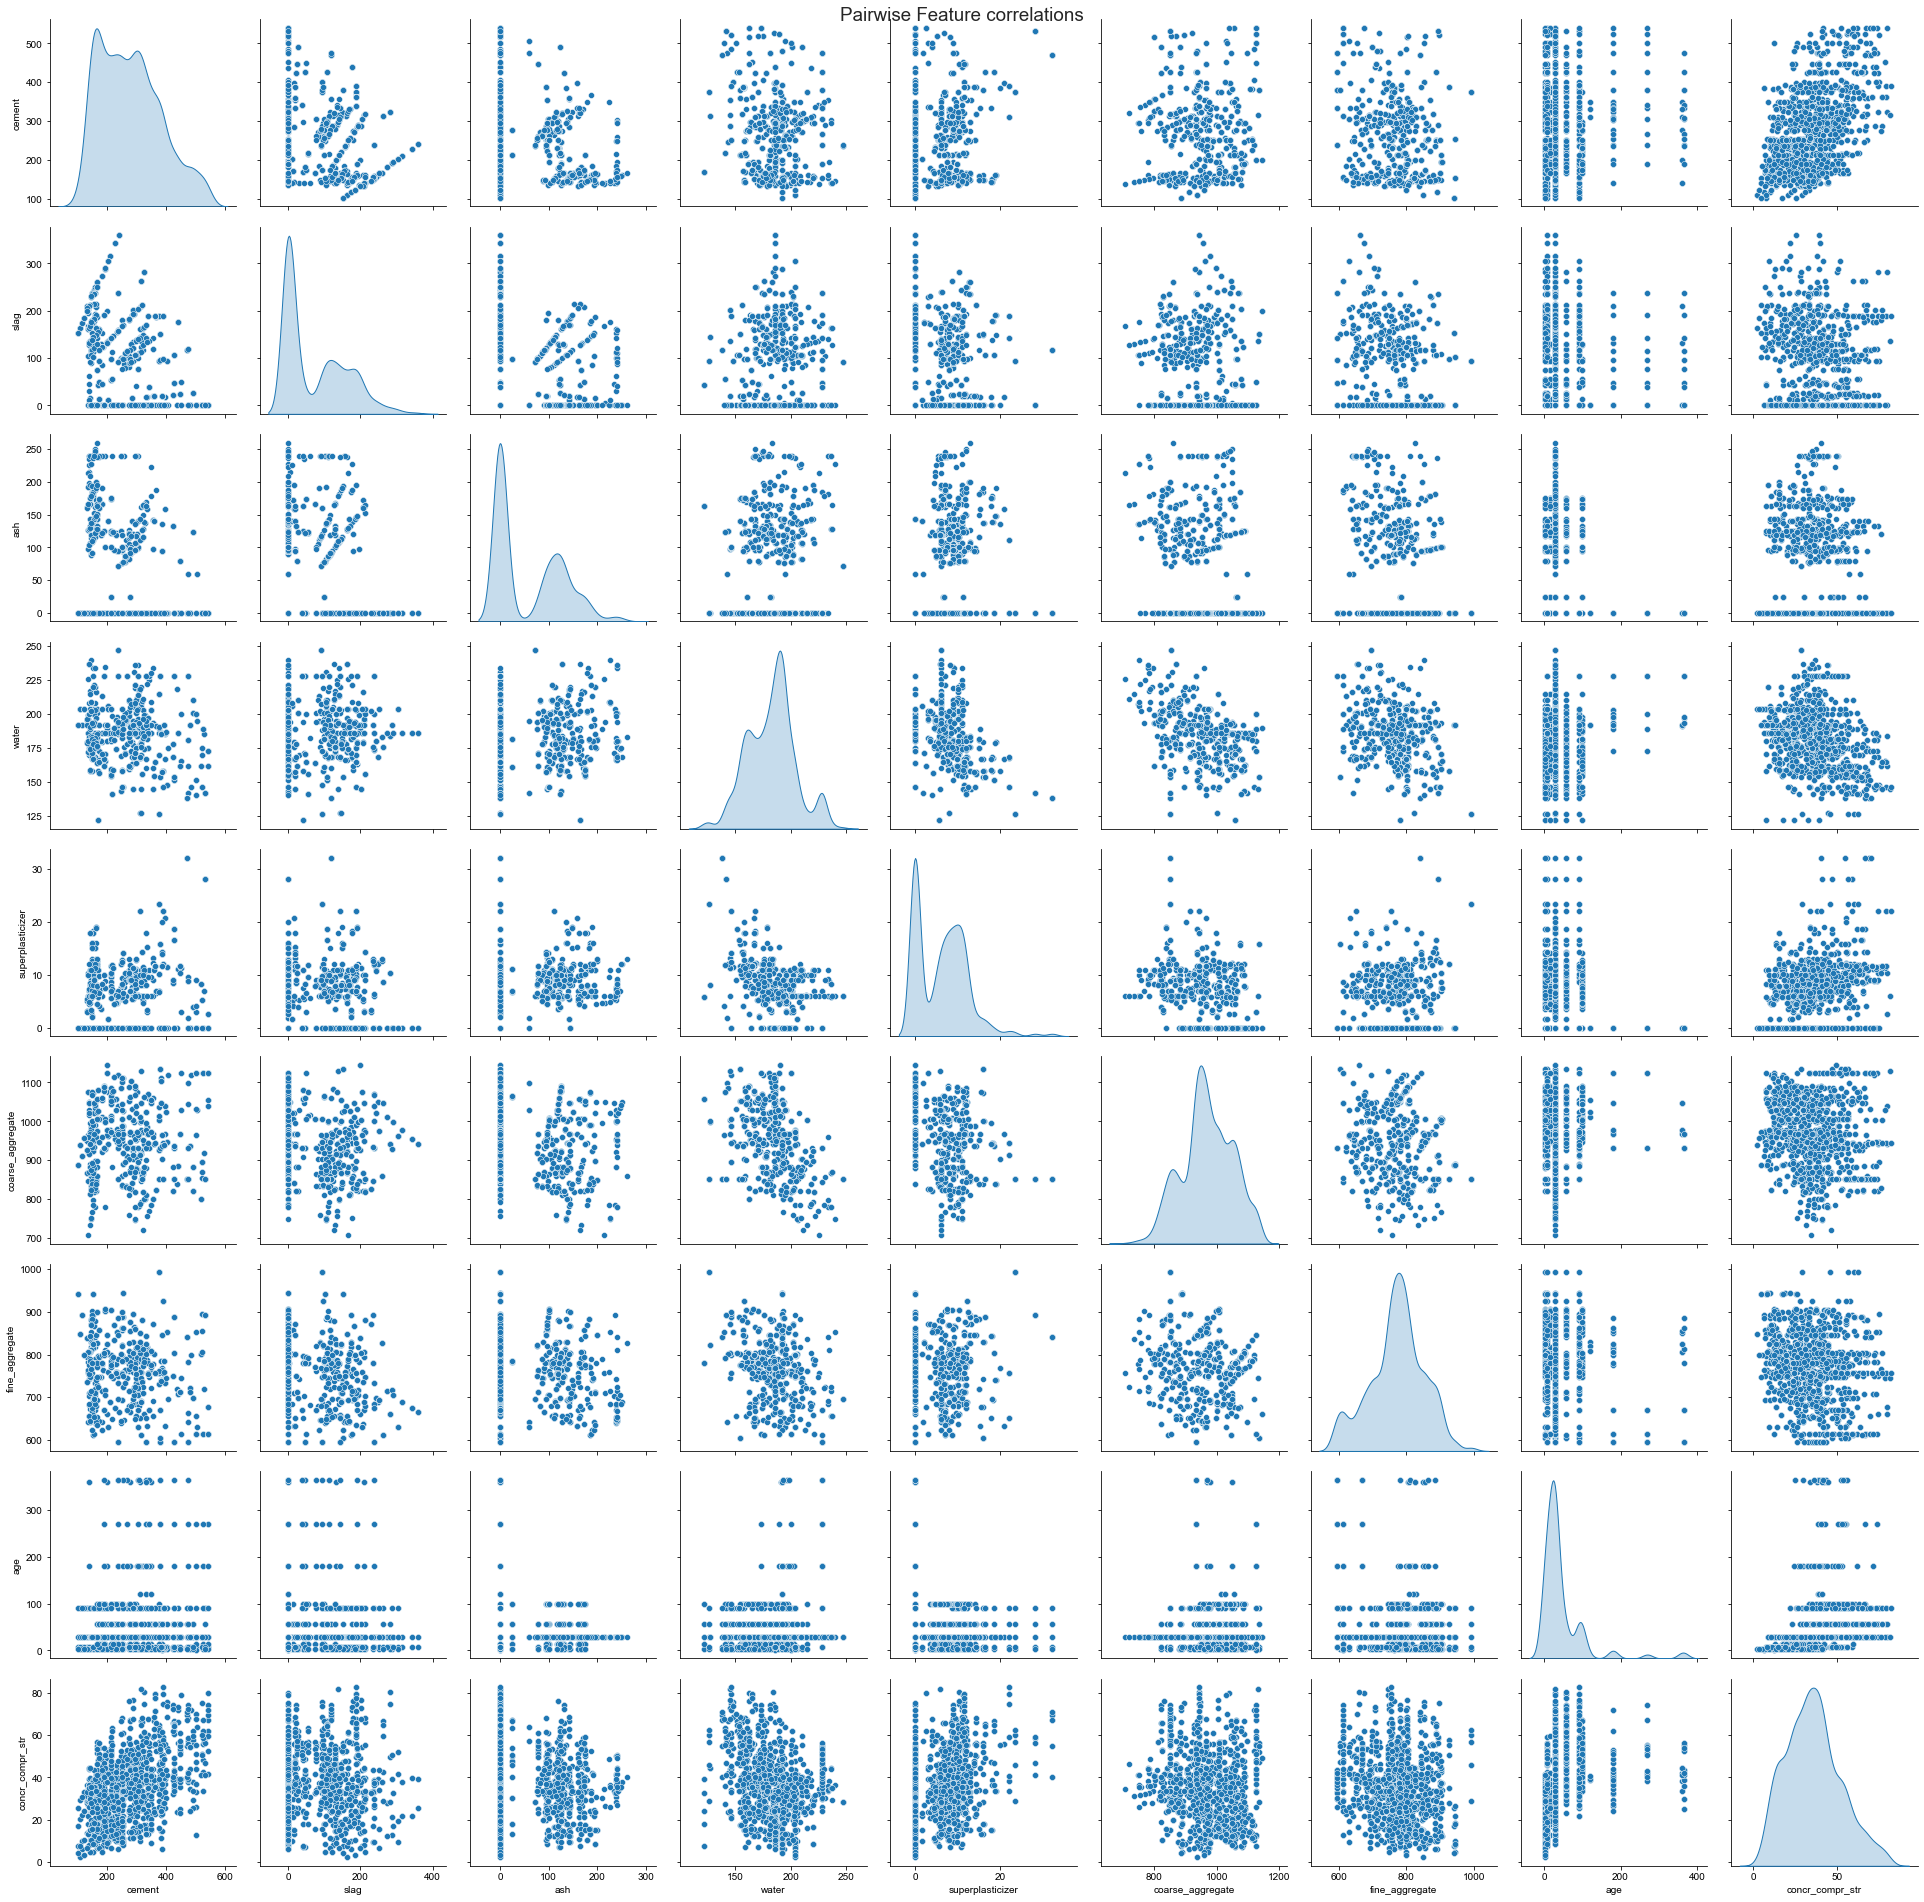

In [29]:
sns.pairplot(concrete_data, diag_kind= "kde", height = 3)
sns.set(font_scale = 1.3)
plt.suptitle("Pairwise Feature correlations")
plt.tight_layout()
plt.show()

From this we can extract different features and see what they can tell us.

#### Distribution of concrete strength

For example lets take distribution of concrete strength:

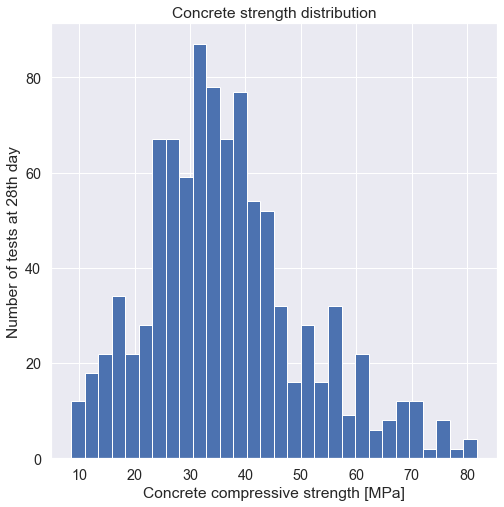

In [30]:
plt.hist(concrete_data.concr_compr_str[concrete_data["age"] == 28], bins = 30)
plt.xlabel("Concrete compressive strength [MPa]")
plt.ylabel("Number of tests at 28th day")
plt.title("Concrete strength distribution")
plt.show()

We can see that most of the tests show strengths between 25 and 45 MPa, which represents the most used concrete classes - from C25 to C45.

Now lets take the statements from the above and try to visualize them in scatterplots.

#### Concrete compressive strength relation with cement, water and age

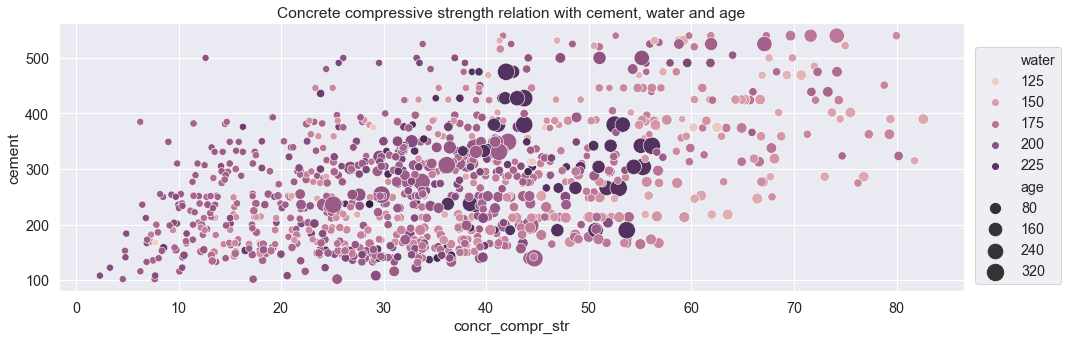

In [31]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.scatterplot(
    x = concrete_data.concr_compr_str, 
    y = concrete_data.cement, 
    hue = "water", 
    size = "age",
    data = concrete_data,
    ax = ax,
    sizes = (50, 300)
)
ax.legend(loc = "lower right", bbox_to_anchor = (1.115, 0))
plt.title("Concrete compressive strength relation with cement, water and age")
plt.tight_layout()
plt.show()

What we can see in this plot is:
- the concentration of dot is higher in the 20 to 40 MPa interval
- with the increasing of the cement in the mix, the strength increases too - the distribution of the dots goes from the lower left to the upper right corner of the plot
- the strength increases with ageing - more bigger dots are located in the right. Smaller dots in the absolute right can be explaned with high class concrete, which reaches this strenght for as shorter period
- lighter dots are located to the right, where are highest strengths. That means that mix with less water reaches higher strength. And now we found very important for every concrete mix ratio, so called water-to-cement ratio. It is related with the chemical process of crystallization, called hydration - water is needed to start that process. It can not be too little - causing the cement to "burn" and the mix is actually not a mix, and it can not be too much - because it will "wash out" the cement from the aggregates. That is why tipically this ratio varies between 0.40 and 0.60. A lower ratio leads to higher strength and durability, but may make the mix difficult to work with and form. Higher ratio makes the consitency more plastic but lowers the strenght. 

#### Concrete compressive strength relation with cement, ash and slag

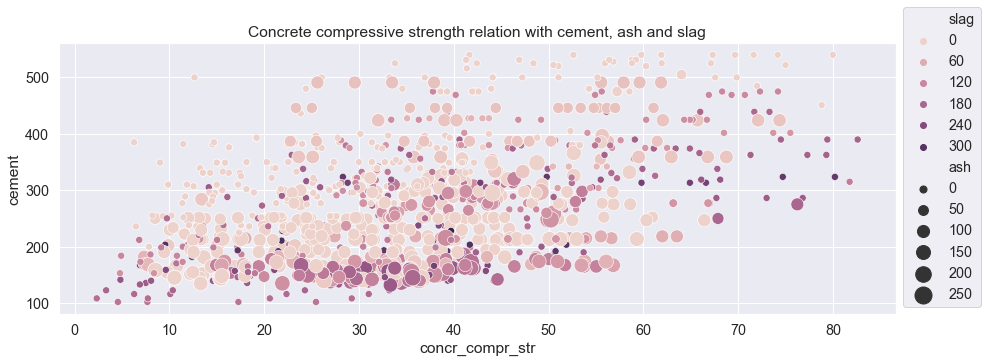

In [32]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.scatterplot(
    x = concrete_data.concr_compr_str, 
    y = concrete_data.cement, 
    hue = "slag", 
    size = "ash",
    data = concrete_data,
    ax = ax,
    sizes = (50, 300)
)
ax.legend(loc = "lower right", bbox_to_anchor = (1.11, 0))
plt.title("Concrete compressive strength relation with cement, ash and slag")
plt.show()

We can see bigger and darker dots at the bottom. That means that we use ash and slag as a substitute of the cement in the mix.

Also combination of slag and cement makes the concrete very strong.

**These are just a few examples how observing of the data and correlations between different features tell us about different properties of the concrete and how to modify the formula to get the desired concrete. But doing it this way is very time consuming and difficult to track all dependencies. So in case we have computer models we can let them do that hard task.**

## Data processing

Before feeding the models we need to process our data and split the features from target, and then split it into train and test data.

### Separating Input features and Target variable

In [33]:
# Independent variables
X = concrete_data.iloc[:, :-1]
X

,cement,slag,ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.00,0.00,0.00,162.00,2.50,1040.0,676.00,28
1,540.00,0.00,0.00,162.00,2.50,1055.0,676.00,28
2,332.50,142.50,0.00,228.00,0.00,932.0,594.00,270
3,332.50,142.50,0.00,228.00,0.00,932.0,594.00,365
4,198.60,132.40,0.00,192.00,0.00,978.4,825.50,360
...,...,...,...,...,...,...,...,...
2158,500.00,0.00,0.00,140.00,4.00,966.0,853.00,28
2159,182.04,45.21,121.97,170.21,8.19,1059.4,780.65,56
2160,236.00,0.00,0.00,194.00,0.00,968.0,885.00,28
2161,252.00,0.00,0.00,185.00,0.00,1111.0,784.00,28


In [34]:
#Dependent variable
y = concrete_data.iloc[:, -1]
y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
2158    67.568648
2159    43.499041
2160    18.415904
2161    19.691435
2162    33.798803
Name: concr_compr_str, Length: 2163, dtype: float64

### Splitting data into Training and Test partitions

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

### Scaling

Standardizing the data i.e. to rescale the features to have a mean of zero and standard deviation of 1.

In [36]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model building

After data processing the data we can fit it in different models, then compare their performance and choose whichh the best to predict concrete compressive strength. This is a regression problem and we can use RMSE (Root Mean Square Error) and $R^2$ score as evaluation metrics.

### 1. Linear Regression

As we have to solve a regression problem we can start first with linear regression algorithm. It tries to form a relationship between the input features and the target variable, tries to fit a straight line between all relational points by the given formula: $$y = a * X + b = \sum_{i = 1}^{n}a_i * X_i + b$$ where $a_i$ corresponds to the coefficient of feature $X_i$.

The magnitude of these coefficients can be further controlled by using regualarization terms to the cost functions.

Using this regualrization technique we can provide a variation of linear regression, called LASSO (**L**east **A**bsolute **S**hrinkage and **S**election **O**perator) regression. It uses shrinkage - data values are shrunk towards a central point as the mean, and it more accurate in preddiction. This is called L1 regularization and it tries to push coefficients to 0.

Another regression we can use is called Ridge regression and it is based on the adding the sum of the squares of the coefficients to the cost function and that will make them be in the same range, e.i. this L2 regularization tries to keep the coefficients as low as possible. It is used when multicollinearity may occur.

In [37]:
# loading different regressions
lin_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
rfr = RandomForestRegressor()
dtr = DecisionTreeRegressor()

# fitting models on training data
lin_reg.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# predicting based on test data
def calculate_y_regr_pred(regressor):
    y_regressor_pred = regressor.predict(X_test)
    return y_regressor_pred

Now lets compare the differences between different regression models represented by the RMSE and $R^2$ score:

In [38]:
regressors_names = {
    lin_reg: "Linear Regression", 
    lasso: "Lasso Regression",
    ridge: "Ridge Regression",
    dtr: "Decision Tree Regressor",
    rfr: "Random Forest Regressor"
}

In [39]:
def calculate_errors(regressor):
    rsme = np.sqrt(mean_squared_error(y_test, calculate_y_regr_pred(regressor))) 
    mse = mean_squared_error(y_test, calculate_y_regr_pred(regressor))
    mae = mean_absolute_error(y_test, calculate_y_regr_pred(regressor))
    r2 = r2_score(y_test, calculate_y_regr_pred(regressor))
    return rsme, mse, mae, r2

In [40]:
def create_errors_table(*regressors):
    errors_table = pd.DataFrame()
    for reg in regressors:
        if reg in regressors_names:
            data = pd.Series([regressors_names[reg], *calculate_errors(reg)]) 
            errors_table = errors_table.append(data, ignore_index = True)

    errors_table.rename(columns = {0: "Model", 1: "RSME", 2: "MSE", 3: "MAE", 4: "R2"}, inplace = True)
    errors_table.set_index("Model", inplace = True)
    return errors_table

In [41]:
errors = create_errors_table(lin_reg, lasso, ridge)
errors

,RSME,MSE,MAE,R2
Model,,,,
Linear Regression,9.803295,96.104586,7.671369,0.651933
Lasso Regression,10.844780,117.609247,8.574583,0.574049
Ridge Regression,9.806983,96.176910,7.675538,0.651671


The performance looks to be simillar but lets plot the coefficients for different features for better visualization. These coefficients are the estimations of the unknown parameters and describe the relationship between a predictor and the response. In linear regression, coefficients are the values that multiply the predictor values.

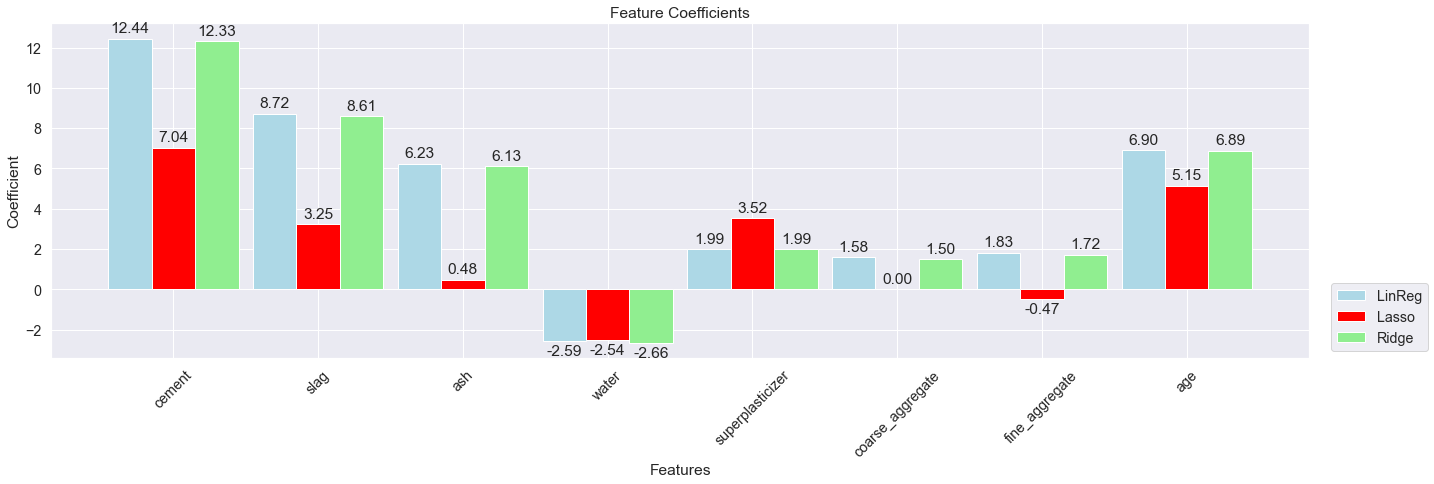

In [42]:
lin_reg_coeff, lasso_coeff, ridge_coeff = lin_reg.coef_, lasso.coef_, ridge.coef_

group_names = concrete_data.columns[:-1]

x = np.arange(len(group_names))
width = 0.3

fig, ax = plt.subplots(figsize = (20, 7))
regr1 = ax.bar(x - 2*(width / 2), lin_reg_coeff, width, label = "LinReg", color = "lightblue")
regr2 = ax.bar(x, lasso_coeff, width, label = "Lasso", color = "red")
regr3 = ax.bar(x + 2*(width / 2), ridge_coeff, width, label = "Ridge", color = "lightgreen")

ax.set_ylabel("Coefficient")
ax.set_xlabel("Features")
ax.set_title("Feature Coefficients")
ax.set_xticks(x)
ax.set_xticklabels(group_names, rotation = 45)
ax.legend(loc = "lower right", bbox_to_anchor = (1.1, 0))

ax.bar_label(regr1, labels = [f"{x:.2f}" for x in regr1.datavalues], padding = 3)
ax.bar_label(regr2, labels = [f"{x:.2f}" for x in regr2.datavalues], padding = 3)
ax.bar_label(regr3, labels = [f"{x:.2f}" for x in regr3.datavalues], padding = 3)

plt.tight_layout()
plt.show()

**It seems that Lasso regression reduces the complexity of the model and keeping the coefficients as low as possible. The Linear and Ridge regressions are almost the same.**

Now lets explore how different regression model perform by comparing true vs predicted values.

In [43]:
def plot_true_vs_pred(regressor):  
    y_pred = calculate_y_regr_pred(regressor)
    fig, ax = plt.subplots(figsize = (6, 6))
    plt.scatter(y_test, y_pred, s = 10)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw = 2, color = "red")
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{regressors_names[regressor]} - True vs Predicted values")
    plt.tight_layout()
    plt.show()

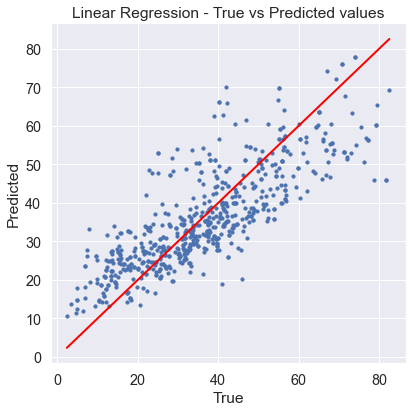

In [44]:
plot_true_vs_pred(lin_reg)

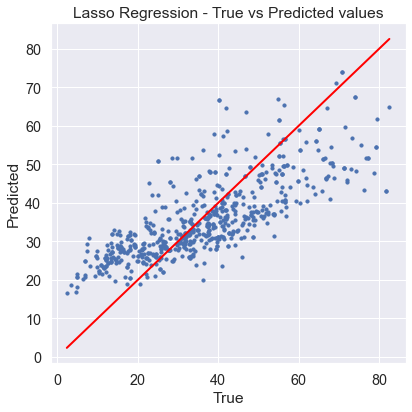

In [45]:
plot_true_vs_pred(lasso)

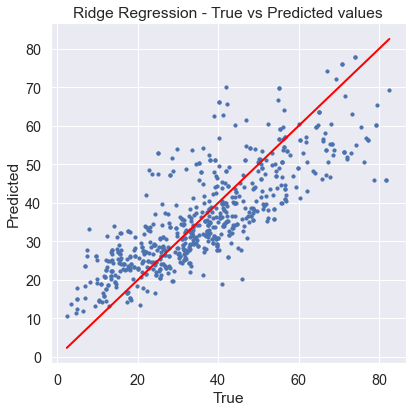

In [46]:
plot_true_vs_pred(ridge)

**What we can see from these plots is that Linear and Ridge regression models perform almost the same, but Lasso is losing accuracy while reducing complexity.**

### 2. Decision Trees

As we see in the plots above we have many instances with zero values for slag, ash and superplasticizers. To eliminate biases we can use another regression model called Decision trees - it builds trees based on the conditions of the features.

In [47]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [48]:
errors = errors.append(create_errors_table(dtr))

In [49]:
errors

,RSME,MSE,MAE,R2
Model,,,,
Linear Regression,9.803295,96.104586,7.671369,0.651933
Lasso Regression,10.844780,117.609247,8.574583,0.574049
Ridge Regression,9.806983,96.176910,7.675538,0.651671
Decision Tree Regressor,4.367164,19.072122,1.598205,0.930926


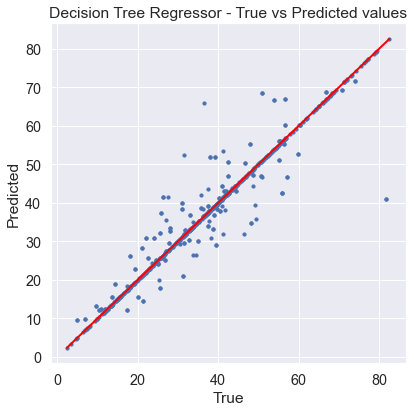

In [50]:
plot_true_vs_pred(dtr)

Now that looks times better. We can see that the root mean square error (RMSE) decreases. Also a lot of the dots on scatter plot lied on the red line. 

### 3. Random Forest Regressor

For even more improved performance we can try Random Forest Regressor. It will improve the performance of the DTR with randomly initializing trees with random subsets of data from the training data. That will make the model robust.

In [51]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
errors = errors.append(create_errors_table(rfr))

In [53]:
errors

,RSME,MSE,MAE,R2
Model,,,,
Linear Regression,9.803295,96.104586,7.671369,0.651933
Lasso Regression,10.844780,117.609247,8.574583,0.574049
Ridge Regression,9.806983,96.176910,7.675538,0.651671
Decision Tree Regressor,4.367164,19.072122,1.598205,0.930926
Random Forest Regressor,3.510366,12.322667,2.013823,0.955370


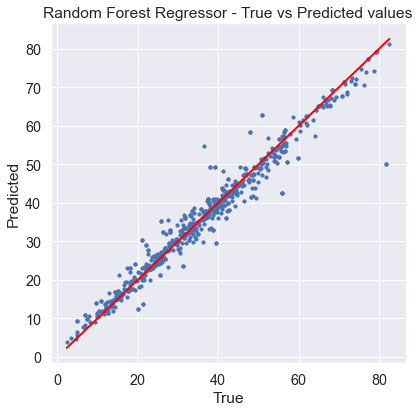

In [54]:
plot_true_vs_pred(rfr)

The RMSE decreases even more and the dots on the scatter plot are more concentrated around the red line.

The RMSE can be further reduces by ensembling multiple trees. To do that we have to know weight of the features for the tree-based models. The weight shows how important for taking the decision is this feature.

### 4. Feature importances for Decision Tree and Random Forest Regressors

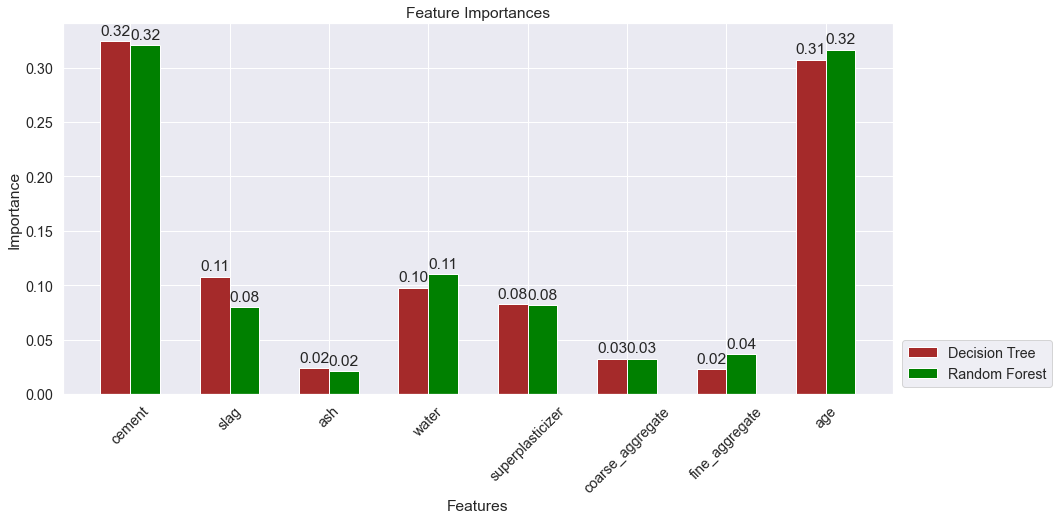

In [55]:
dtr_feature = dtr.feature_importances_
rfr_feature = rfr.feature_importances_

group_names = concrete_data.columns[:-1]

x = np.arange(len(group_names))
width = 0.3

fig, ax = plt.subplots(figsize = (15, 7.5))
regr1 = ax.bar(x - (width / 2), dtr_feature, width, label = "Decision Tree", color = "brown")
regr2 = ax.bar(x + (width / 2), rfr_feature, width, label = "Random Forest", color = "green")

ax.set_ylabel("Importance")
ax.set_xlabel("Features")
ax.set_title("Feature Importances")
ax.set_xticks(x)
ax.set_xticklabels(group_names, rotation = 45)
ax.legend(loc = "lower right", bbox_to_anchor = (1.2, 0))

ax.bar_label(regr1, labels = [f"{x:.2f}" for x in regr1.datavalues], padding = 3)
ax.bar_label(regr2, labels = [f"{x:.2f}" for x in regr2.datavalues], padding = 3)

plt.tight_layout()
plt.show()

As it is show on the barchart - cement and age are the most important features in taking decisions. Ash, fine and coarse aggregates are least important factors.

Now, before our final decision about which model is best for predicting the concrete compressive strength, lets make a camparison between the error in different regressors. 

In [56]:
#errors
lin_reg_rsme, lin_reg_mse, lin_reg_mae, lin_reg_r2 = calculate_errors(lin_reg)
lasso_rsme, lasso_mse, lasso_mae, lasso_r2 = calculate_errors(lasso)
ridge_rsme, ridge_mse, ridge_mae, ridge_r2 = calculate_errors(ridge)
dtr_rsme, dtr_mse, dtr_mae, dtr_r2 = calculate_errors(dtr)
rfr_rsme, rfr_mse, rfr_mae, rfr_r2 = calculate_errors(rfr)

rmses = [lin_reg_rsme, lasso_rsme, ridge_rsme, dtr_rsme, rfr_rsme]
mses = [lin_reg_mse, lasso_mse, ridge_mse, dtr_mse, rfr_mse]
maes = [lin_reg_mae, lasso_mae, ridge_mae, dtr_mae, rfr_mae]
r2s = [lin_reg_r2, lasso_r2, ridge_r2, dtr_r2, rfr_r2]

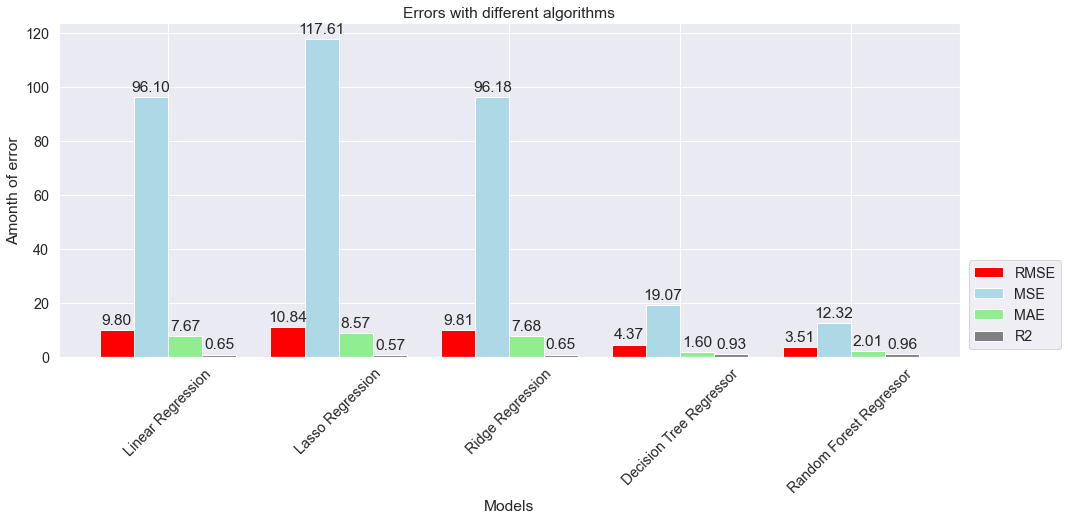

In [57]:
x = np.arange(len(regressors_names)) 
width = 0.2

fig, ax = plt.subplots(figsize = (15, 7.5))
err1 = ax.bar(x - 3*(width / 2), rmses, width, label = "RMSE", color = "red")
err2 = ax.bar(x - (width / 2), mses, width, label = "MSE", color = "lightblue")
err3 = ax.bar(x + (width / 2), maes, width, label = "MAE", color = "lightgreen")
err4 = ax.bar(x + 3*(width / 2), r2s, width, label = "R2", color = "gray")

ax.set_ylabel("Amonth of error")
ax.set_xlabel("Models")
ax.set_title("Errors with different algorithms")
ax.set_xticks(x)
ax.set_xticklabels(regressors_names.values(), rotation = 45)
ax.legend(loc = "lower right", bbox_to_anchor = (1.12, 0))

ax.bar_label(err1, labels = [f"{x:.2f}" for x in err1.datavalues], padding = 3)
ax.bar_label(err2, labels = [f"{x:.2f}" for x in err2.datavalues], padding = 3)
ax.bar_label(err3, labels = [f"{x:.2f}" for x in err3.datavalues], padding = 3)
ax.bar_label(err4, labels = [f"{x:.2f}" for x in err4.datavalues], padding = 3)

plt.tight_layout()
plt.show()

Because of the higher values of MSE this barchart is a bit difficult to read. So lets extract only RMSE and R2.

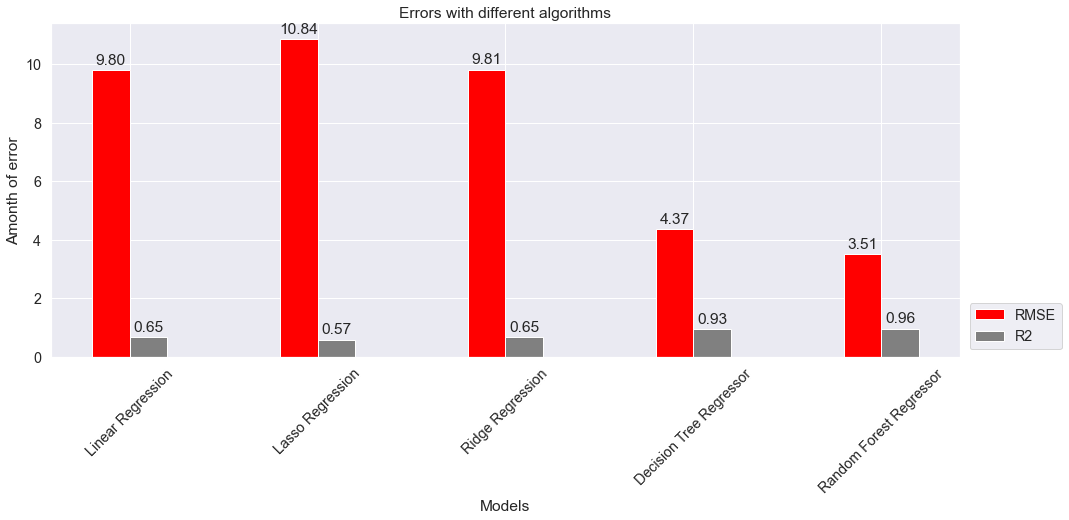

In [58]:
x = np.arange(len(regressors_names)) 
width = 0.2

fig, ax = plt.subplots(figsize = (15, 7.5))
err1 = ax.bar(x - (width / 2), rmses, width, label = "RMSE", color = "red")
err2 = ax.bar(x + (width / 2), r2s, width, label = "R2", color = "gray")

ax.set_ylabel("Amonth of error")
ax.set_xlabel("Models")
ax.set_title("Errors with different algorithms")
ax.set_xticks(x)
ax.set_xticklabels(regressors_names.values(), rotation = 45)
ax.legend(loc = "lower right", bbox_to_anchor = (1.12, 0))

ax.bar_label(err1, labels = [f"{x:.2f}" for x in err1.datavalues], padding = 3)
ax.bar_label(err2, labels = [f"{x:.2f}" for x in err2.datavalues],  padding = 3)

plt.tight_layout()
plt.show()

**Now it is more clear that we have a minimum RMSE and maximum $R^2$ score with the Random Forest Regressor, which makes it the best choise for our prediction.**

## Conclusion

In this project we explore and analyse dataset with different prescriptions for concrete mixtures and made a prediction of concrete compressive strength using different regression algorithms. We saw that Random Forest Regressor is the best decision for our problem, giving us the smallest error and highest score.

## References

1. [UCI - ML Repository - Concrete Compressive Strength Data Set](http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)
2. [The University of Melbourne - Compressive strength dataset of normal concrete](https://melbourne.figshare.com/articles/dataset/Compressive_strength_dataset_of_foamed_normal_concrete_for_prediction_model/7028369)
3. [How to Evaluate Compressive Strength of Concrete](https://www.fprimec.com/how-to-evaluate-compressive-strength-of-concrete/)